In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [63]:
df=pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [65]:
df.shape

(1599, 12)

In [66]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [68]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [69]:
df["quality"] = (df["quality"] >= 6).astype(int)


# Outliers detection

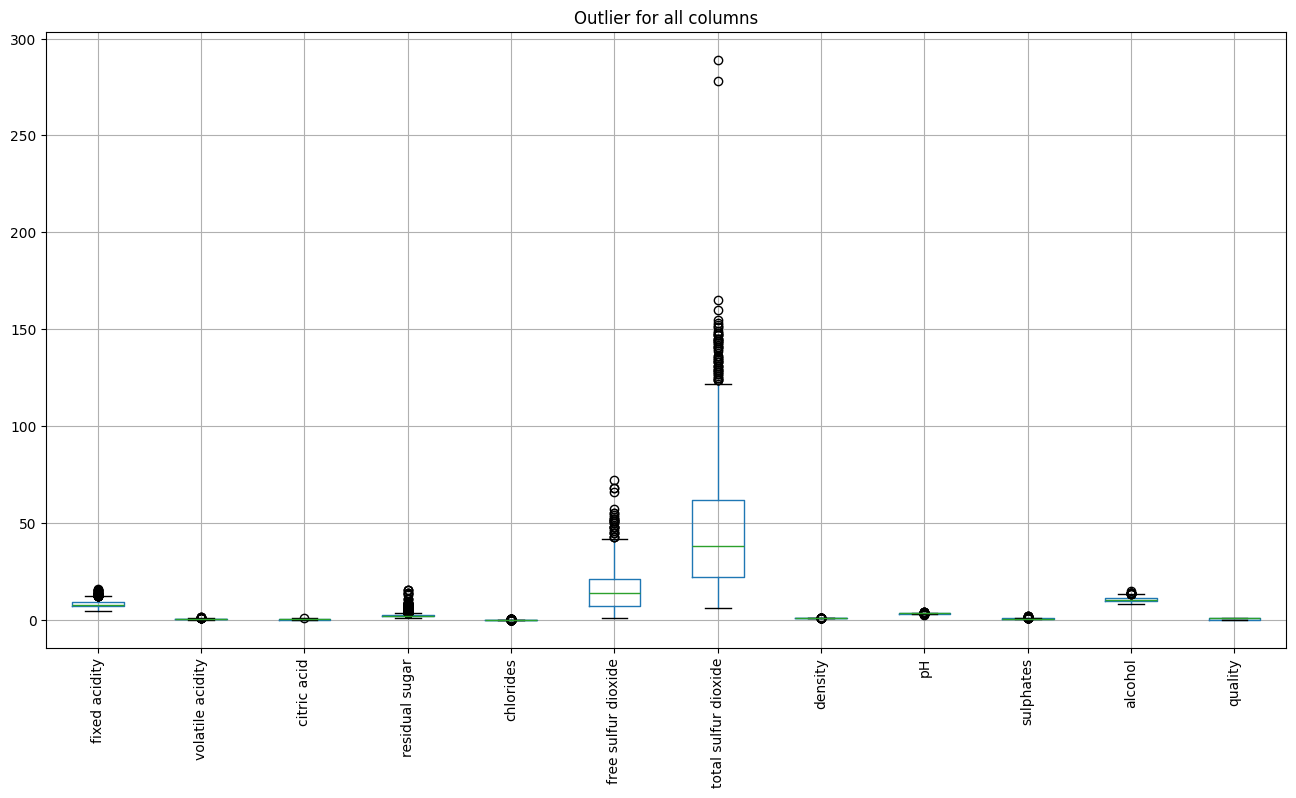

In [70]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
df.boxplot()
plt.title("Outlier for all columns")
plt.xticks(rotation=90)
plt.show()

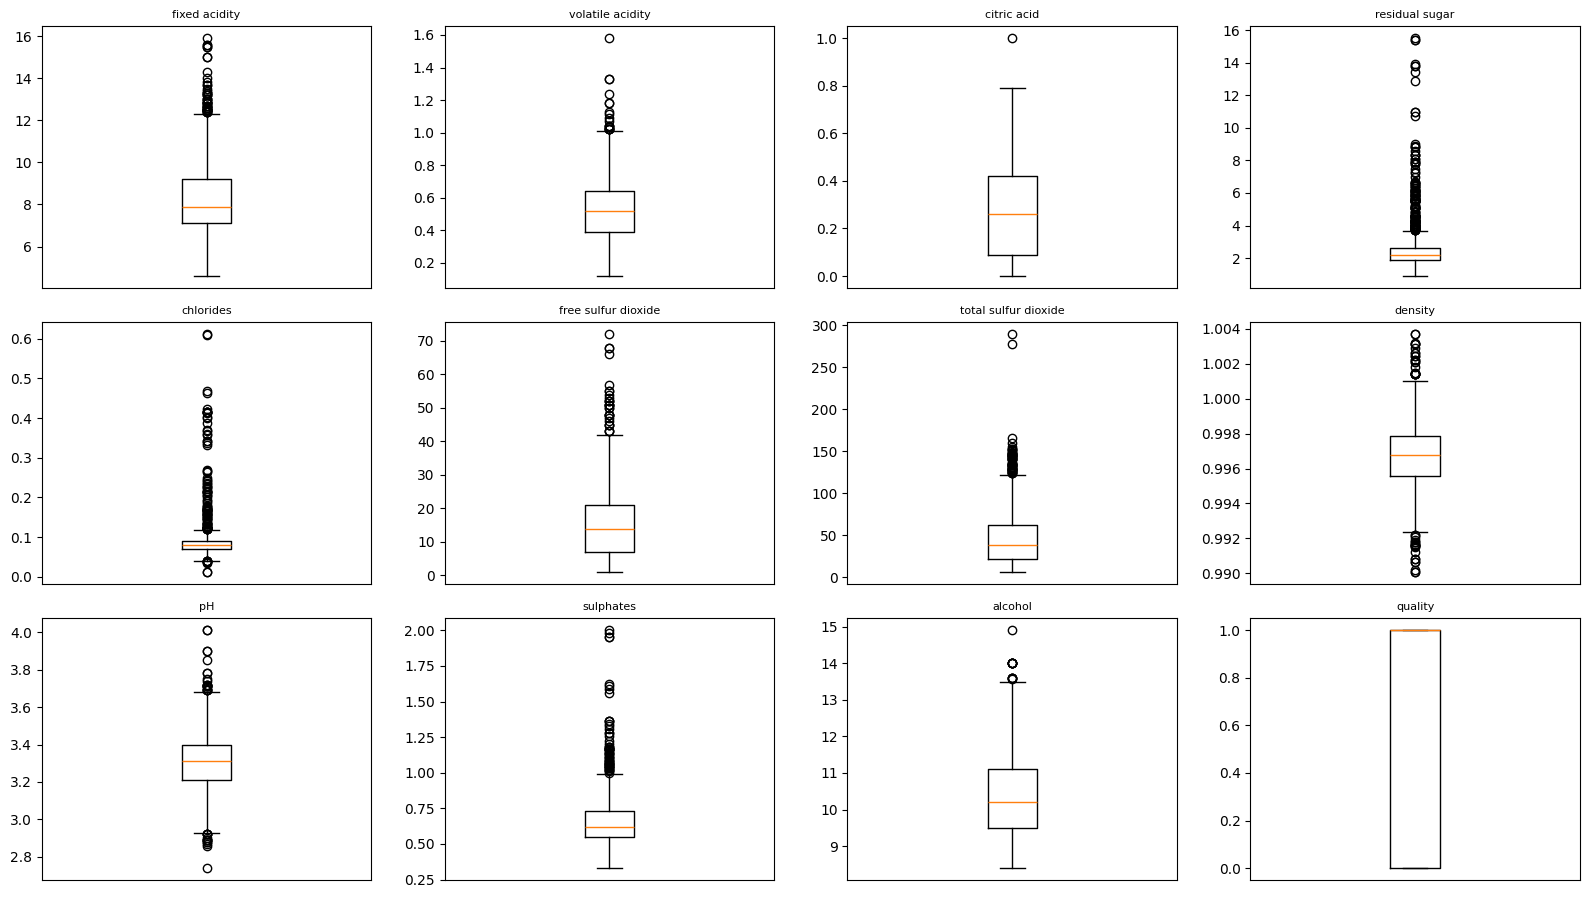

In [71]:
import math
import matplotlib.pyplot as plt

cols = df.columns
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 3*n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(col, fontsize=8)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [72]:
outlier_summary = {}

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'fixed acidity': 49,
 'volatile acidity': 19,
 'citric acid': 1,
 'residual sugar': 155,
 'chlorides': 112,
 'free sulfur dioxide': 30,
 'total sulfur dioxide': 55,
 'density': 45,
 'pH': 35,
 'sulphates': 59,
 'alcohol': 13,
 'quality': 0}

# Outlier correction

In [73]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[df.columns] = scaler.fit_transform(df)
X_scaled=df[df.columns]

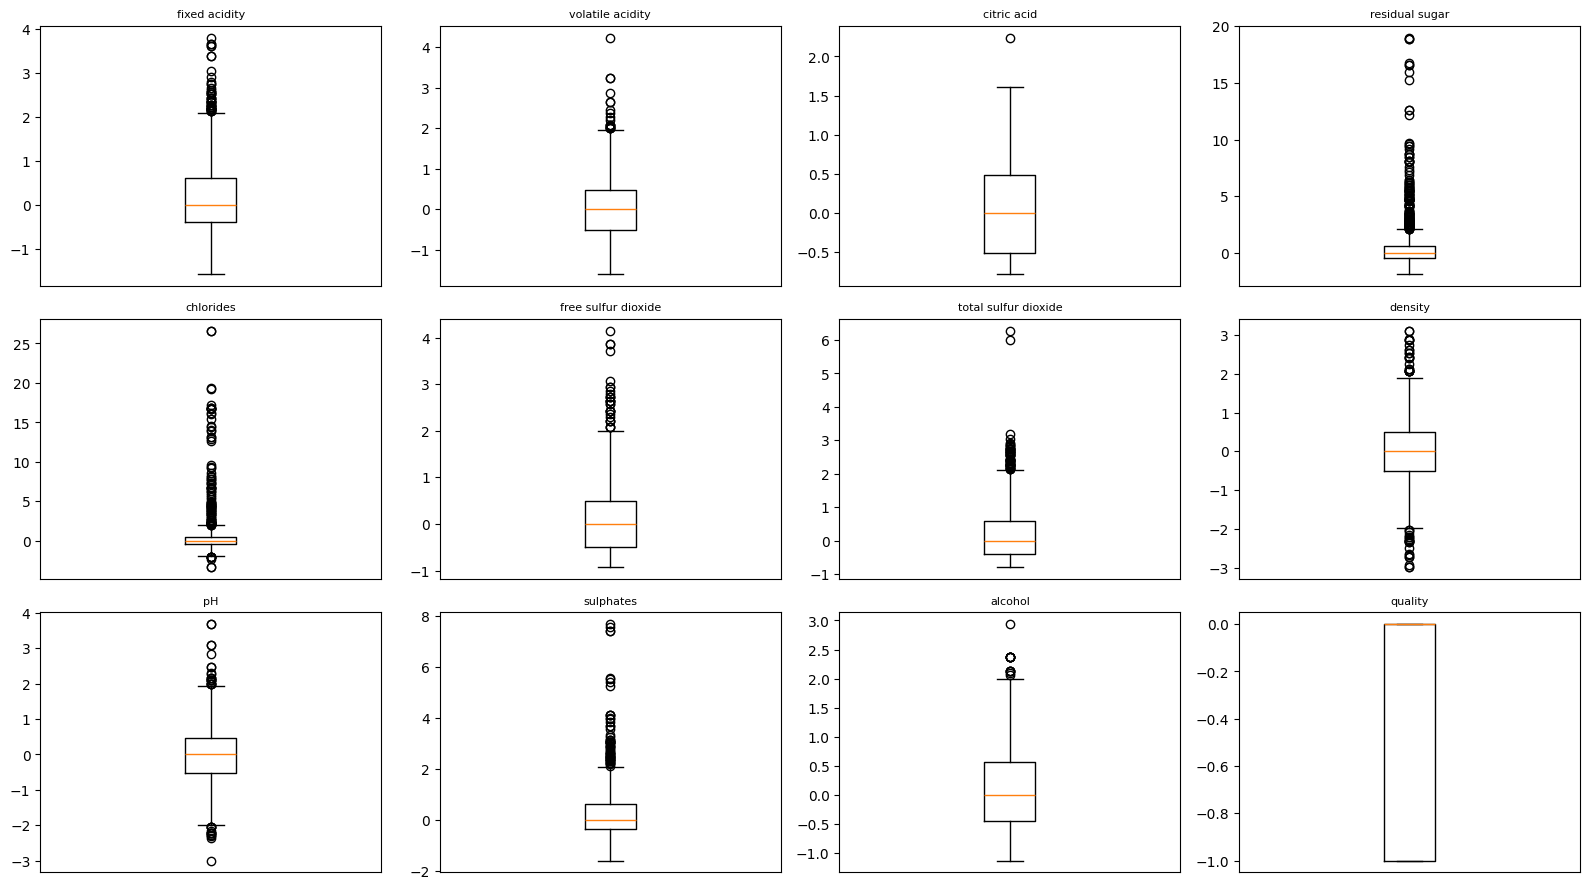

In [74]:
import math
import matplotlib.pyplot as plt

cols = df.columns
n_cols = 4
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(4*n_cols, 3*n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[col].dropna())
    plt.title(col, fontsize=8)
    plt.xticks([])

plt.tight_layout()
plt.show()

In [75]:
outlier_summary = {}

for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

outlier_summary

{'fixed acidity': 49,
 'volatile acidity': 19,
 'citric acid': 1,
 'residual sugar': 155,
 'chlorides': 112,
 'free sulfur dioxide': 30,
 'total sulfur dioxide': 55,
 'density': 45,
 'pH': 35,
 'sulphates': 59,
 'alcohol': 14,
 'quality': 0}

# Plot distribution

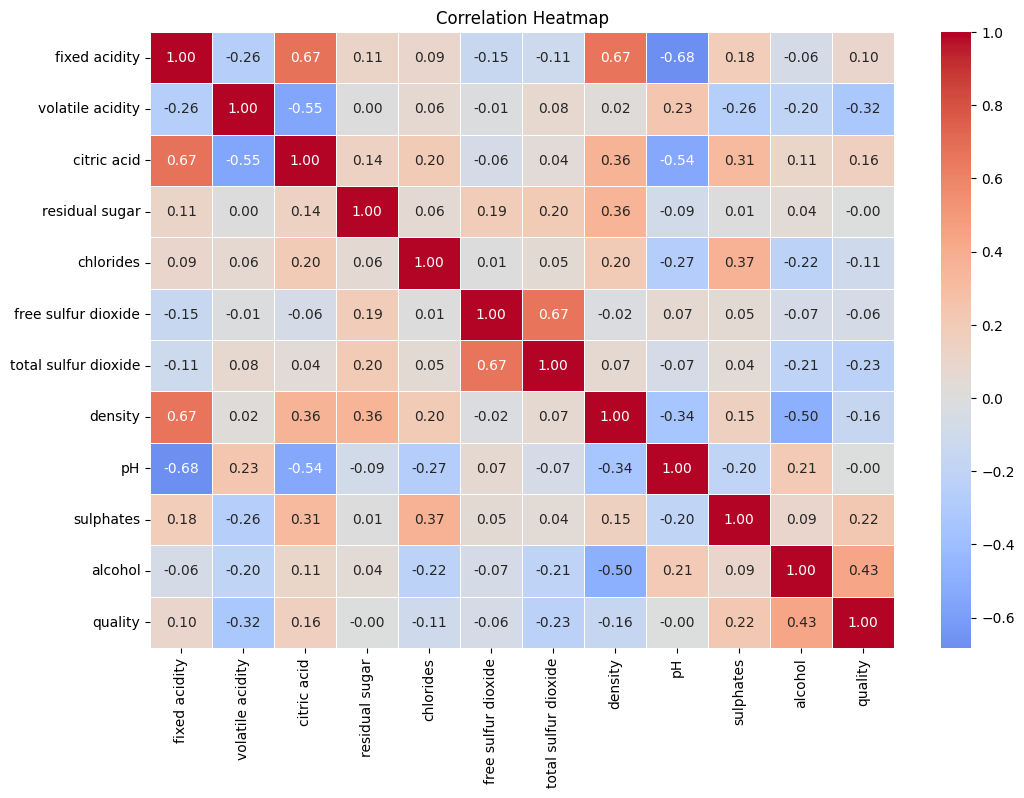

In [76]:

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calculate correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            center=0,         
            linewidths=0.5)   
plt.title("Correlation Heatmap")
plt.show()

In [77]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [78]:
df['quality'].unique

<bound method Series.unique of 0      -1.0
1      -1.0
2      -1.0
3       0.0
4      -1.0
       ... 
1594   -1.0
1595    0.0
1596    0.0
1597   -1.0
1598    0.0
Name: quality, Length: 1599, dtype: float64>

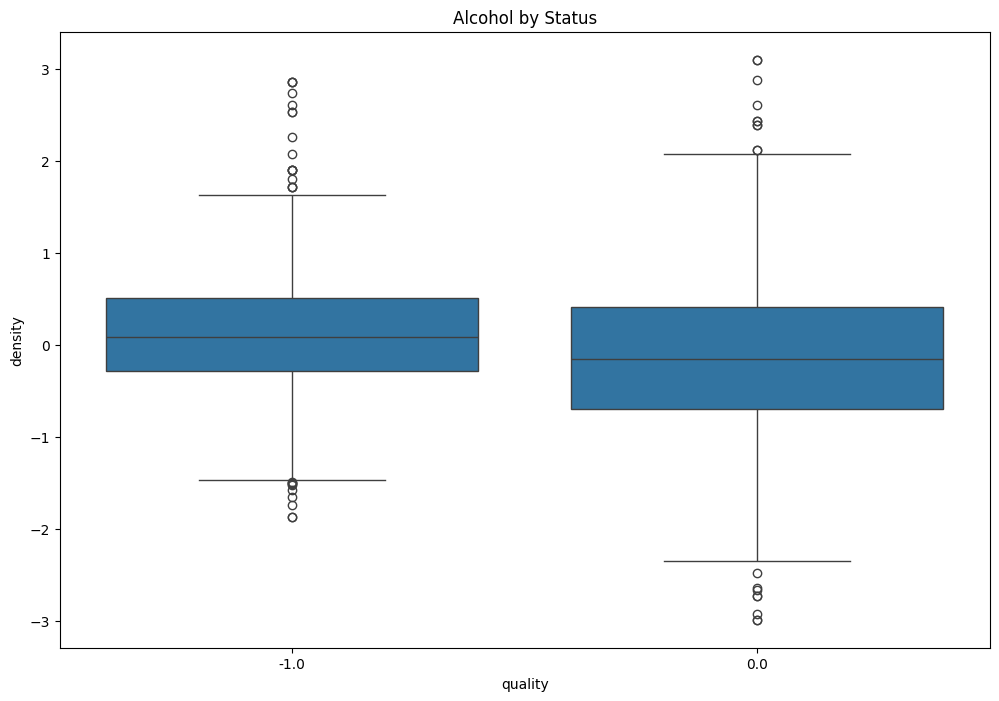

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="quality", y="density")
plt.title("Alcohol by Status")
plt.show()

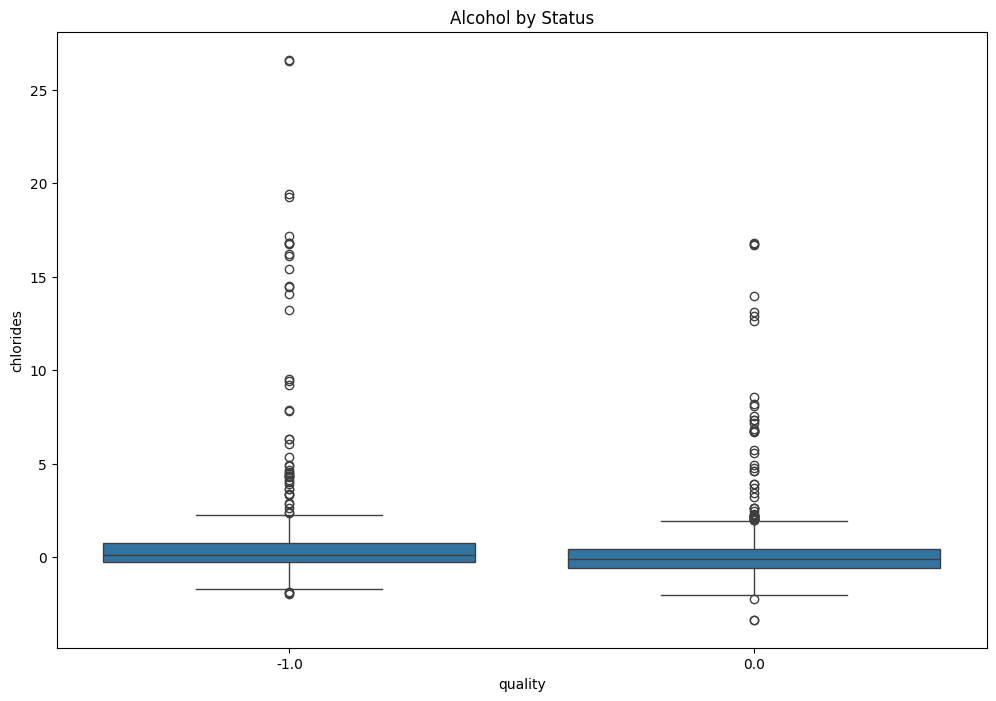

In [80]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="quality", y="chlorides")
plt.title("Alcohol by Status")
plt.show()

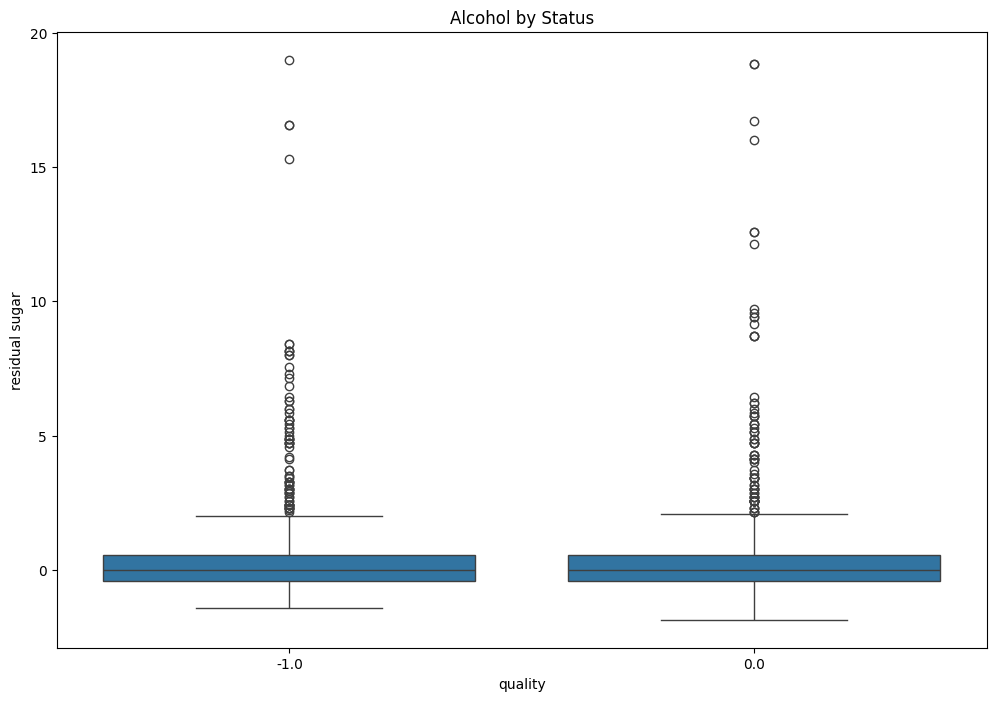

In [81]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="quality", y="residual sugar")
plt.title("Alcohol by Status")
plt.show()

In [82]:
X=df.drop("quality", axis=1)
y=df["quality"]

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [84]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Scaling

In [85]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [87]:
y_pred = model.predict(X_test_scaled)


In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7375
Confusion Matrix:
 [[110  31]
 [ 53 126]]
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.67      0.78      0.72       141
         0.0       0.80      0.70      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



In [89]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


ROC-AUC: 0.8188121557906416


# Note

**The main thing is to convert multiple target vales into binary values.**